In [17]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ====== 1. Load your dataset ======

In [2]:
df = pd.read_csv("Cleaned_Fitness_Classes_Data.csv")

# ====== 2. Apply log transformation ======

In [6]:
df["log_price"] = np.log(df["Price (INR)"])
df["log_demand"] = np.log(df["Number Booked"])

# ====== 3. Fit Log-Log regression ======


In [7]:
X = sm.add_constant(df["log_price"])
y = df["log_demand"]

In [8]:
model = sm.OLS(y, X).fit()

In [9]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             log_demand   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     118.7
Date:                Tue, 19 Aug 2025   Prob (F-statistic):           3.47e-27
Time:                        14:29:07   Log-Likelihood:                -3770.2
No. Observations:                3271   AIC:                             7544.
Df Residuals:                    3269   BIC:                             7557.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0299      0.222     22.688      0.0

# ====== 4. Extract Elasticity ======


In [10]:
elasticity = model.params["log_price"]
print(f"\nEstimated Price Elasticity of Demand: {elasticity:.3f}")


Estimated Price Elasticity of Demand: -0.325


# ====== 5. Plot Demand Curve ======


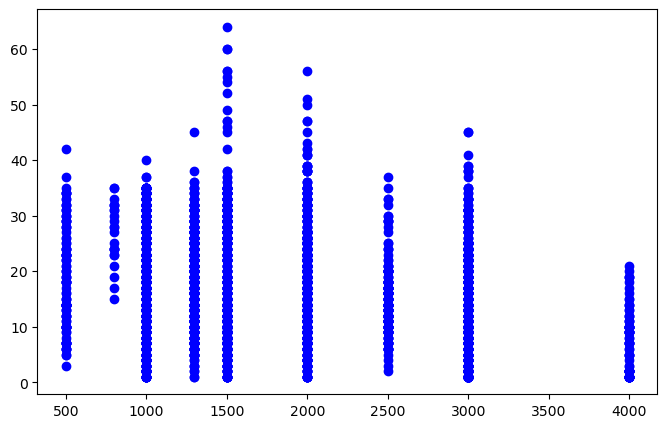

In [12]:
plt.figure(figsize=(8,5))
plt.scatter(df["Price (INR)"], df["Number Booked"], label="Actual Data", color="blue")

# Predicted demand from the model


In [13]:
df["predicted_log_demand"] = model.predict(X)
df["predicted_demand"] = np.exp(df["predicted_log_demand"])

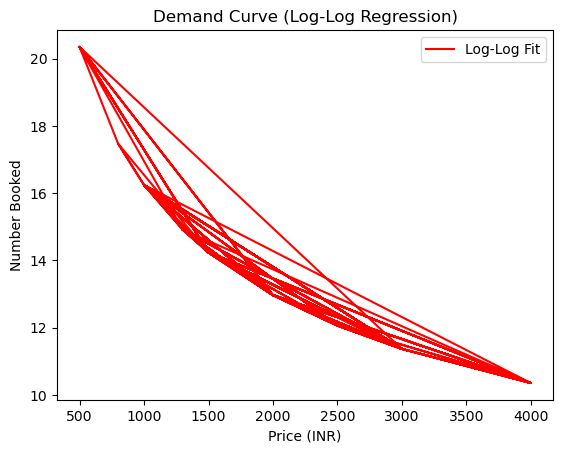

In [15]:
plt.plot(df["Price (INR)"], df["predicted_demand"], color="red", label="Log-Log Fit")
plt.xlabel("Price (INR)")
plt.ylabel("Number Booked")
plt.title("Demand Curve (Log-Log Regression)")
plt.legend()
plt.show()

# ====== Metrics ======


In [19]:
mse = mean_squared_error(df["Number Booked"], df["predicted_demand"])
rmse = np.sqrt(mse)
mae = mean_absolute_error(df["Number Booked"], df["predicted_demand"])
mape = np.mean(np.abs((df["Number Booked"] - df["predicted_demand"]) / df["Number Booked"])) * 100

In [20]:
print("Model Validation Metrics:")
print(f"R-squared: {model.rsquared:.3f}")
print(f"Adjusted R-squared: {model.rsquared_adj:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"MAPE: {mape:.2f}%")

Model Validation Metrics:
R-squared: 0.035
Adjusted R-squared: 0.035
MSE: 99.309
RMSE: 9.965
MAE: 7.931
MAPE: 94.06%


# ====== Residuals ======


In [22]:
df["residuals"] = df["Number Booked"] - df["predicted_demand"]

# Residual vs Fitted


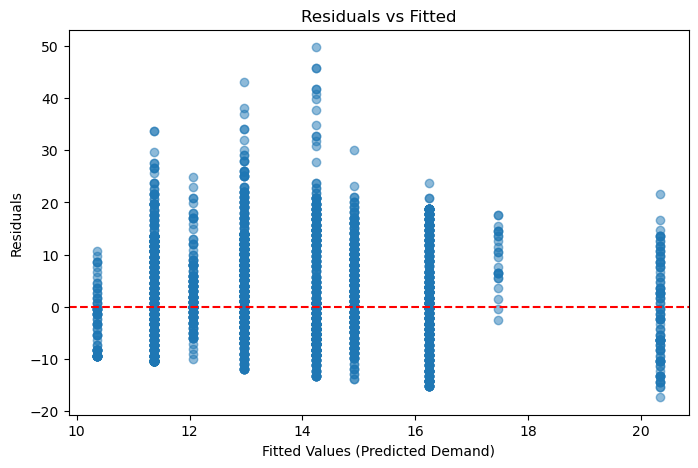

In [23]:
plt.figure(figsize=(8,5))
plt.scatter(df["predicted_demand"], df["residuals"], alpha=0.5)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Fitted Values (Predicted Demand)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

# Histogram of residuals


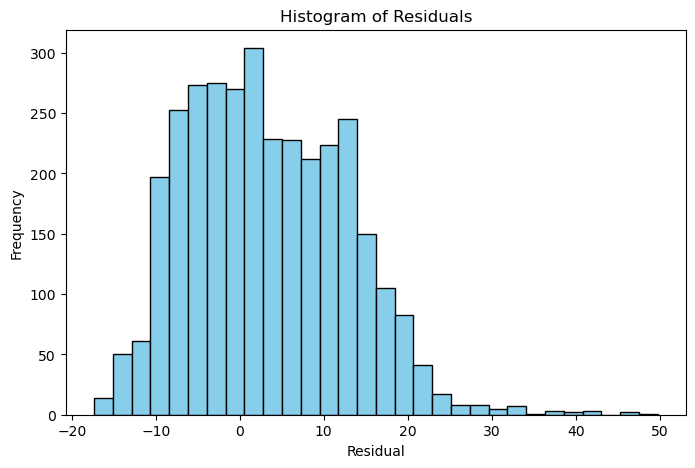

In [24]:
plt.figure(figsize=(8,5))
plt.hist(df["residuals"], bins=30, color="skyblue", edgecolor="black")
plt.title("Histogram of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

# QQ plot


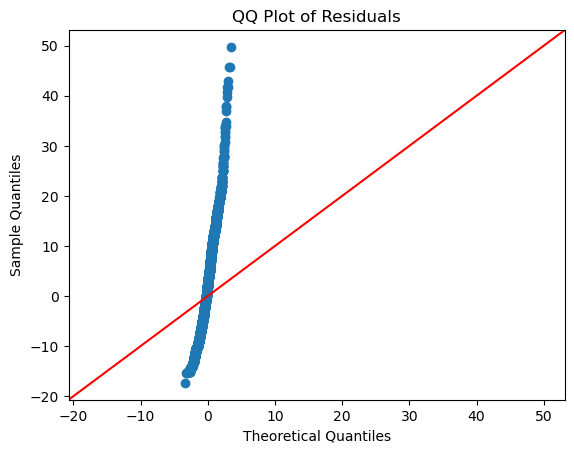

In [25]:
sm.qqplot(df["residuals"], line="45")
plt.title("QQ Plot of Residuals")
plt.show()